# Homework 1: Diagnostic

Ben Fogarty

CAPP 30254: Machine Learning for Public Policy

Spring 2019

9 April 2019

## Initialization

All the code for this assignment is located in a module name chicago_crime.py, which we now load in with the alias cc.

In [1]:
import chicago_crime as cc

This module has the following requirements:


| library | version |
- | - |
| sodapy | .5.2 |
| pandas | 0.23.4  |
| geopandas | 0.4.1 |
| shapely | 1.6.4.post2 |
| numpy | 1.15.4  | 
| seaborn | 0.9.0 |
| matplotlib | 3.0.3  |
| urllib3 | 1.24.1 |
| descartes | 1.1.0 |
| rtree | 0.8.3 |

Additonally, this program also relies on the libspatialindex library version 1.8.5, which is not a Python package.


We also need to load our Chicago Open Data Portal and Census API tokens from a local file tokens.txt.

In [2]:
cc.read_api_tokens('tokens.txt')

## Question 1
### Part (a)

To download crime reports data from the Chicago Open Data Portal for the years 2017-2018, there is a function inside chicago_crime named download_crime_reports. This function takes in two parameters: the first year to collect data from and the last year to download data from.

In [3]:
crime_reports = cc.download_crime_reports(2017, 2018)

crime_reports

,arrest,beat,block,case_number,community_area,date,description,district,domestic,fbi_code,...,latitude,location,location_description,longitude,primary_type,updated_on,ward,x_coordinate,y_coordinate,year
0,True,1034,026XX S CALIFORNIA BLVD,JA529032,30,2017-11-28 21:43:00,VIOLENT OFFENDER: ANNUAL REGISTRATION,010,False,26,...,41.843778,"{'type': 'Point', 'coordinates': [-87.69463767...",JAIL / LOCK-UP FACILITY,-87.694638,OTHER OFFENSE,2018-02-11T15:54:58.000,12,1158280,1886310,2017
1,True,1221,007XX N SACRAMENTO BLVD,JA545986,23,2017-12-11 19:15:00,ARMED: HANDGUN,012,False,03,...,41.894476,"{'type': 'Point', 'coordinates': [-87.70216915...",SIDEWALK,-87.702169,ROBBERY,2018-02-11T15:54:58.000,27,1156092,1904769,2017
2,False,2222,092XX S RACINE AVE,JB147188,73,2017-10-08 03:00:00,NON-AGGRAVATED,022,False,02,...,NaN,NaN,RESIDENCE,NaN,CRIM SEXUAL ASSAULT,2018-02-11T15:57:41.000,21,NaN,NaN,2017
3,False,0835,026XX W 79TH ST,JB147595,70,2017-03-28 14:00:00,UNLAWFUL ENTRY,008,False,05,...,NaN,NaN,OTHER,NaN,BURGLARY,2018-02-11T15:57:41.000,18,NaN,NaN,2017
4,False,0313,060XX S EBERHART AVE,JB147230,42,2017-09-09 20:17:00,OVER $500,003,False,06,...,NaN,NaN,RESIDENCE,NaN,THEFT,2018-02-11T15:57:41.000,20,NaN,NaN,2017
5,True,0215,003XX E 47TH ST,JA522842,38,2017-11-23 15:14:00,AGGRAVATED: HANDGUN,002,False,04A,...,41.809343,"{'type': 'Point', 'coordinates': [-87.61909899...",DEPARTMENT STORE,-87.619099,ASSAULT,2018-06-21T15:59:22.000,3,1178967,1873924,2017
6,False,0122,001XX W RANDOLPH ST,JB147599,32,2017-08-26 10:00:00,NON-AGGRAVATED,001,False,02,...,NaN,NaN,HOTEL/MOTEL,NaN,CRIM SEXUAL ASSAULT,2018-02-11T15:57:41.000,42,NaN,NaN,2017
7,False,0524,117XX S SANGAMON ST,JB140548,53,2018-02-04 01:36:00,FIRST DEGREE MURDER,005,False,01A,...,41.680739,"{'type': 'Point', 'coordinates': [-87.64566114...",STREET,-87.645661,HOMICIDE,2019-03-18T16:08:09.000,34,1172100,1827003,2018
8,False,2433,011XX W GRANVILLE AVE,JB108189,77,2018-01-08 06:50:00,AUTOMOBILE,024,False,07,...,41.994567,"{'type': 'Point', 'coordinates': [-87.65901631...",STREET,-87.659016,MOTOR VEHICLE THEFT,2018-05-04T15:51:04.000,48,1167554,1941332,2018
9,False,2411,025XX W TOUHY AVE,JB108139,2,2018-01-07 21:00:00,AUTOMOBILE,024,False,07,...,42.012201,"{'type': 'Point', 'coordinates': [-87.69390481...",STREET,-87.693905,MOTOR VEHICLE THEFT,2018-05-04T15:51:04.000,50,1158022,1947685,2018


Looking at this data, we can see that the community_area column, which should represent the Chicago neighborhood in which a crime report was filed, is represented as a number instead of a name. These numbers can be mapped to names using the "Boundaries - Community Areas" dataset on the Chicago Open Data Portal (this dataset will also be useful for generating maps later on). In the chicago_crime module, there is a function named download_community_areas that will load in this dataset. 

In [4]:
community_areas = cc.download_community_areas()

There is also a function named link_reports_nieghborhood, which takes in a set of crime reports and community areas, and replaces the community_area column in the crimes reports dataset with the appropriate name from the community areas dataset.

In [5]:
crime_reports = cc.link_reports_neighborhoods(crime_reports, community_areas)

crime_reports

,arrest,beat,block,case_number,community_area,date,description,district,domestic,fbi_code,...,latitude,location,location_description,longitude,primary_type,updated_on,ward,x_coordinate,y_coordinate,year
0,True,1034,026XX S CALIFORNIA BLVD,JA529032,SOUTH LAWNDALE,2017-11-28 21:43:00,VIOLENT OFFENDER: ANNUAL REGISTRATION,010,False,26,...,41.843778,"{'type': 'Point', 'coordinates': [-87.69463767...",JAIL / LOCK-UP FACILITY,-87.694638,OTHER OFFENSE,2018-02-11T15:54:58.000,12,1158280,1886310,2017
1,True,1221,007XX N SACRAMENTO BLVD,JA545986,HUMBOLDT PARK,2017-12-11 19:15:00,ARMED: HANDGUN,012,False,03,...,41.894476,"{'type': 'Point', 'coordinates': [-87.70216915...",SIDEWALK,-87.702169,ROBBERY,2018-02-11T15:54:58.000,27,1156092,1904769,2017
2,False,2222,092XX S RACINE AVE,JB147188,WASHINGTON HEIGHTS,2017-10-08 03:00:00,NON-AGGRAVATED,022,False,02,...,NaN,NaN,RESIDENCE,NaN,CRIM SEXUAL ASSAULT,2018-02-11T15:57:41.000,21,NaN,NaN,2017
3,False,0835,026XX W 79TH ST,JB147595,ASHBURN,2017-03-28 14:00:00,UNLAWFUL ENTRY,008,False,05,...,NaN,NaN,OTHER,NaN,BURGLARY,2018-02-11T15:57:41.000,18,NaN,NaN,2017
4,False,0313,060XX S EBERHART AVE,JB147230,WOODLAWN,2017-09-09 20:17:00,OVER $500,003,False,06,...,NaN,NaN,RESIDENCE,NaN,THEFT,2018-02-11T15:57:41.000,20,NaN,NaN,2017
5,True,0215,003XX E 47TH ST,JA522842,GRAND BOULEVARD,2017-11-23 15:14:00,AGGRAVATED: HANDGUN,002,False,04A,...,41.809343,"{'type': 'Point', 'coordinates': [-87.61909899...",DEPARTMENT STORE,-87.619099,ASSAULT,2018-06-21T15:59:22.000,3,1178967,1873924,2017
6,False,0122,001XX W RANDOLPH ST,JB147599,LOOP,2017-08-26 10:00:00,NON-AGGRAVATED,001,False,02,...,NaN,NaN,HOTEL/MOTEL,NaN,CRIM SEXUAL ASSAULT,2018-02-11T15:57:41.000,42,NaN,NaN,2017
7,False,0524,117XX S SANGAMON ST,JB140548,WEST PULLMAN,2018-02-04 01:36:00,FIRST DEGREE MURDER,005,False,01A,...,41.680739,"{'type': 'Point', 'coordinates': [-87.64566114...",STREET,-87.645661,HOMICIDE,2019-03-18T16:08:09.000,34,1172100,1827003,2018
8,False,2433,011XX W GRANVILLE AVE,JB108189,EDGEWATER,2018-01-08 06:50:00,AUTOMOBILE,024,False,07,...,41.994567,"{'type': 'Point', 'coordinates': [-87.65901631...",STREET,-87.659016,MOTOR VEHICLE THEFT,2018-05-04T15:51:04.000,48,1167554,1941332,2018
9,False,2411,025XX W TOUHY AVE,JB108139,WEST RIDGE,2018-01-07 21:00:00,AUTOMOBILE,024,False,07,...,42.012201,"{'type': 'Point', 'coordinates': [-87.69390481...",STREET,-87.693905,MOTOR VEHICLE THEFT,2018-05-04T15:51:04.000,50,1158022,1947685,2018


### Part (b)

Having read in the crime_reports dataset and updated the community_area field, we are now ready to summarize the dataset.

In [6]:
len(crime_reports)

534374

We have a total of 534,373 crime reports in our dataset from 2017-2018.

In [7]:
cc.summarize_on_field(crime_reports, 'primary_type')

                                    Count  Percentage
THEFT                              129428   24.220490
BATTERY                             98995   18.525415
CRIMINAL DAMAGE                     56848   10.638242
ASSAULT                             39680    7.425511
DECEPTIVE PRACTICE                  37764    7.066961
OTHER OFFENSE                       34357    6.429392
BURGLARY                            24730    4.627845
NARCOTICS                           24646    4.612126
ROBBERY                             21559    4.034440
MOTOR VEHICLE THEFT                 21394    4.003563
CRIMINAL TRESPASS                   13716    2.566742
WEAPONS VIOLATION                   10136    1.896799
OFFENSE INVOLVING CHILDREN           4497    0.841545
CRIM SEXUAL ASSAULT                  3256    0.609311
PUBLIC PEACE VIOLATION               2867    0.536516
INTERFERENCE WITH PUBLIC OFFICER     2391    0.447439
SEX OFFENSE                          2129    0.398410
PROSTITUTION                

Across the city, theft is by far the most common crime reported, accounting for more than 24% of all crime reports. Combined, the top three types of crime -- theft, battery, and criminal damage -- account for a little more than half (53%) of all crime reports in Chicago. Burglaries and roberies account for 4.6% and 4.0% of crime reports respectively, and homicides account for 0.24% of all crime reports in Chicago.

In [8]:
cc.summarize_yearly(crime_reports)

      Number of Reports  Percent Change
2017             268096             NaN
2018             266278       -0.678115


The number of crime reports filed in Chicago was reasonably similar between 2017 and 2018. Though the number of reports did decrease from 268,098 in 2017 to 266,275 in 2018, that quantity represents a decrease of less than one percent.

year                                2017   2018  Change (absolute)
primary_type                                                      
ROBBERY                            11877   9682              -2195
MOTOR VEHICLE THEFT                11406   9988              -1418
BURGLARY                           13000  11730              -1270
CRIMINAL DAMAGE                    29042  27806              -1236
DECEPTIVE PRACTICE                 19028  18736               -292
PUBLIC PEACE VIOLATION              1498   1369               -129
OTHER OFFENSE                      17227  17130                -97
HOMICIDE                             676    586                -90
ARSON                                444    372                -72
OFFENSE INVOLVING CHILDREN          2268   2229                -39
KIDNAPPING                           190    169                -21
PROSTITUTION                         735    718                -17
OTHER NARCOTIC VIOLATION              11      1               

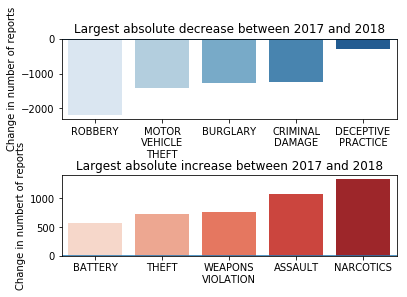

In [9]:
cc.summarize_yoy_change(crime_reports, 'primary_type', 2017, 2018)

Though the overall number of crime reports remained fairly constant between 2017 and 2018, the types of crime reported differed somewhat between the two years. In particular, the number of reports for robberies, motor vehicle thefts, burglaries, and criminal damages decreased the most between the two years. Reports for narcotics, assaults, weapons violations, thefts, and batteries increased the most between the two years.

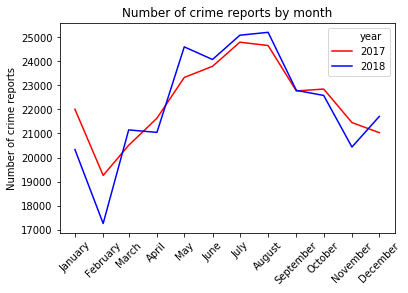

In [10]:
cc.summarize_monthly(crime_reports)

Based on 2017 and 2018 data, the number of crime reports appears to have a seasonal trend, peaking in the summer months and lessening during the winter months. This seasonality, however, does not necessarily hold for individual types of crime reports.

Sex Offenses:


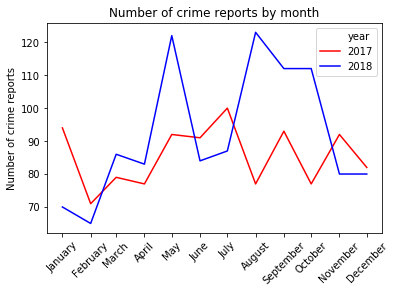


Deceptive Practices:


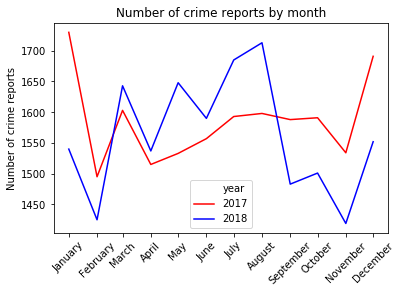

In [11]:
print('Sex Offenses:')
cc.summarize_monthly(crime_reports[crime_reports.primary_type == 'SEX OFFENSE'])
print()

print('Deceptive Practices:')
cc.summarize_monthly(crime_reports[crime_reports.primary_type == 'DECEPTIVE PRACTICE'])

Crime reports for sex offenses and deceptive practices, for example, display much weaker to non-existent seasonal trends.

Thefts:


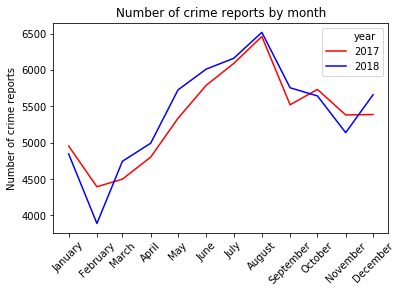


Batteries:


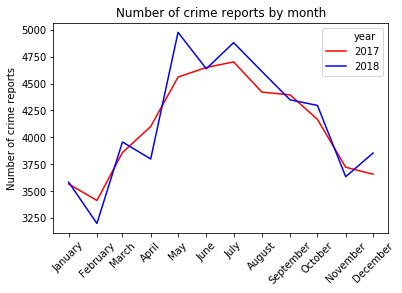


Criminal Damages:


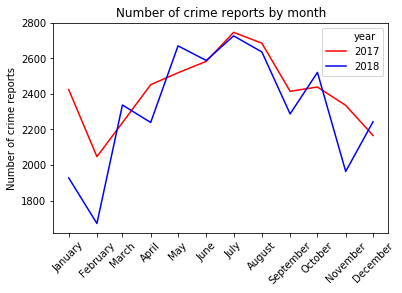

In [12]:
print('Thefts:')
cc.summarize_monthly(crime_reports[crime_reports.primary_type == 'THEFT'])
print()

print('Batteries:')
cc.summarize_monthly(crime_reports[crime_reports.primary_type == 'BATTERY'])
print()

print('Criminal Damages:')
cc.summarize_monthly(crime_reports[crime_reports.primary_type == 'CRIMINAL DAMAGE'])
print()

Theft, battery, and criminal damage reports, which as previously stated account for over half of all crime reports in the dataset, do display strong seasonal trends.

count       77.000000
mean      6939.857143
std       6052.972108
min        528.000000
25%       2445.000000
50%       4896.000000
75%       9471.000000
max      30428.000000
Name: community_area, dtype: float64



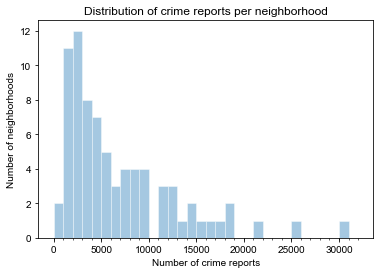

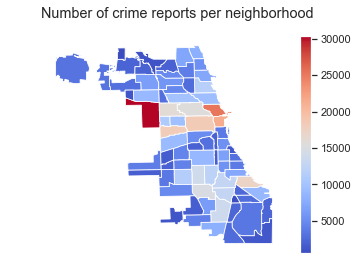


Number of crime reports by neighborhood:
EDISON PARK                 528
BURNSIDE                    755
FOREST GLEN                1042
MOUNT GREENWOOD            1149
MONTCLARE                  1205
HEGEWISCH                  1294
OAKLAND                    1344
ARCHER HEIGHTS             1666
FULLER PARK                1716
BEVERLY                    1809
CLEARING                   1854
MCKINLEY PARK              1958
NORTH PARK                 1967
WEST ELSDON                2031
ARMOUR SQUARE              2034
JEFFERSON PARK             2154
NORWOOD PARK               2275
PULLMAN                    2298
EAST SIDE                  2318
AVALON PARK                2445
RIVERDALE                  2705
NORTH CENTER               2748
CALUMET HEIGHTS            2750
HERMOSA                    2902
KENWOOD                    2988
DUNNING                    3016
BRIDGEPORT                 3025
OHARE                      3313
SOUTH DEERING              3500
WEST LAWN                  364

In [13]:
cc.summarize_neighborhoods(crime_reports, community_areas)

The average number of crime reports per neighborhood is 6940, with a standard deviation of 6053, implying that the number of crimes per neighborhood may vary significantly across neighborhoods. The median number of crime reports per neighborhood is 4896.

The first graph is a histogram illustrating the distribtuion of crime reports across different neighborhoods. This distribtuion has a long-right tail, incidating that some neighborhoods experience extremely high levels of crime relative to other neighborhoods. There is a large cluster of neighborhoods with between 1000 and 5000 crime reports in the data set, and then other neighborhoods disperesed among higher numers of crime reports.

Looking at the map and table provided at the bottom, the five neighborhoods with the highest number of crime reports are Austin, the Near North Side, the Loop, the Near West Side, and North Lawdale. The Loop and the Near North Side are both located in the heart of Chicago's downtown, but Austin, the Near West Side, and North Lawndale are all located on the city's West Side.

In [14]:
print('The Loop and the Near North Side types of crime:')
cc.summarize_on_field(crime_reports[(crime_reports.community_area == 'LOOP') | 
                                    (crime_reports.community_area == 'NEAR NORTH SIDE')],
                      'primary_type')
print()

print('Austin, the Near West Side, and North Lawndale types of crime:')
cc.summarize_on_field(crime_reports[(crime_reports.community_area == 'AUSTIN') | 
                                    (crime_reports.community_area == 'NEAR WEST SIDE') |
                                    (crime_reports.community_area == 'NORTH LAWNDALE')],
                      'primary_type')

The Loop and the Near North Side types of crime:
                                   Count  Percentage
THEFT                              23695   50.579546
DECEPTIVE PRACTICE                  7041   15.029778
BATTERY                             4907   10.474523
CRIMINAL DAMAGE                     2121    4.527504
ASSAULT                             1944    4.149679
ROBBERY                             1501    3.204047
CRIMINAL TRESPASS                   1249    2.666126
OTHER OFFENSE                       1217    2.597818
MOTOR VEHICLE THEFT                  934    1.993724
BURGLARY                             637    1.359746
NARCOTICS                            436    0.930689
CRIM SEXUAL ASSAULT                  294    0.627575
PUBLIC PEACE VIOLATION               239    0.510171
SEX OFFENSE                          154    0.328730
WEAPONS VIOLATION                    101    0.215595
INTERFERENCE WITH PUBLIC OFFICER      68    0.145153
LIQUOR LAW VIOLATION                  68    0.1451

Amongst the five neighborhoods with the most crime reports, the types of crime reports differ somewhat between those neighborhoods located in Chicago's downtown versus the city's West Side. Though reports for theft are the most common type in both groups, they account for more than half of the reports in the Loop and the Near North Side but only 20% of the reports in Austin, the Near West Side, and North Lawndale.

In the Loop and the Near North Side, deceptive practices reports make up 15% of all crime reports, but in Austin, the Near West Side, and North Lawndale, deceptive practices reports make up only 6% of all reports. Narcotics accounts for 10% of all crime reports in the data set from Austin, the Near West Side, and North Lawndale, but less than 1% of all reports in the Loop and the Near North Side.

Homicides:


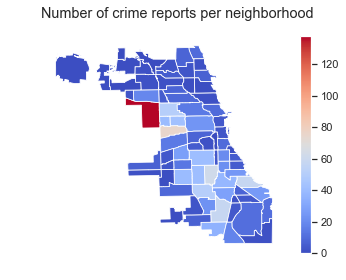


Narcotics:


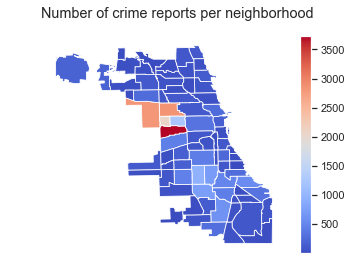


Weapons Violations:


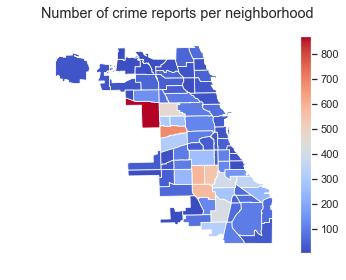

In [15]:
print('Homicides:')
cc.map_neighborhood_stats(crime_reports[crime_reports.primary_type == 'HOMICIDE'], community_areas)
print()

print('Narcotics:')
cc.map_neighborhood_stats(crime_reports[crime_reports.primary_type == 'NARCOTICS'], community_areas)
print()

print('Weapons Violations:')
cc.map_neighborhood_stats(crime_reports[crime_reports.primary_type == 'WEAPONS VIOLATION'], community_areas)

More broadly, we can see that there are differences in where different types of crime reports are concentrated across the city. For example, homicides, narcotics, and weapons violations reports are overwheming concenatrated in a few neighborhoods on the city's South and West Sides.

Deceptive Practices:


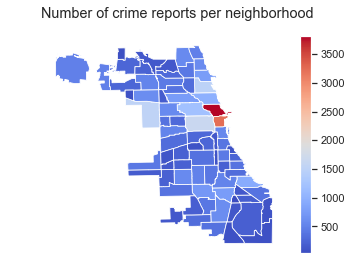


Sex Offenses:


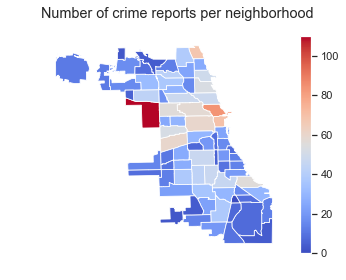


Burglaries:


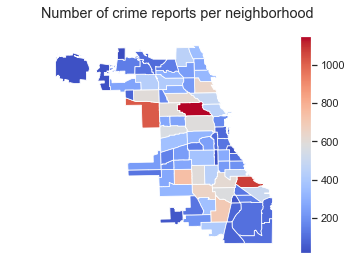

In [16]:
print('Deceptive Practices:')
cc.map_neighborhood_stats(crime_reports[crime_reports.primary_type == 'DECEPTIVE PRACTICE'], community_areas)
print()

print('Sex Offenses:')
cc.map_neighborhood_stats(crime_reports[crime_reports.primary_type == 'SEX OFFENSE'], community_areas)
print()

print('Burglaries:')
cc.map_neighborhood_stats(crime_reports[crime_reports.primary_type == 'BURGLARY'], community_areas)
print()

Meanwhile, reports of deceptive practices are heavliy concentrated in two neighborhoods located in Chicago's downtown area, and reports of sex offenses and burglaries are somewhat more evenly spread out across different parts of the city.

year                     2017   2018  Change (absolute)
community_area                                         
WEST TOWN                8324   7301              -1023
NEW CITY                 4645   4221               -424
WOODLAWN                 3840   3469               -371
ROGERS PARK              4148   3801               -347
AUSTIN                  15386  15042               -344
SOUTH CHICAGO            4574   4316               -258
BELMONT CRAGIN           4605   4359               -246
GAGE PARK                2306   2063               -243
LOWER WEST SIDE          2626   2385               -241
GRAND BOULEVARD          3451   3242               -209
IRVING PARK              3008   2818               -190
PORTAGE PARK             3371   3198               -173
AUBURN GRESHAM           7527   7370               -157
LOGAN SQUARE             5064   4909               -155
MCKINLEY PARK            1052    906               -146
GREATER GRAND CROSSING   6481   6338            

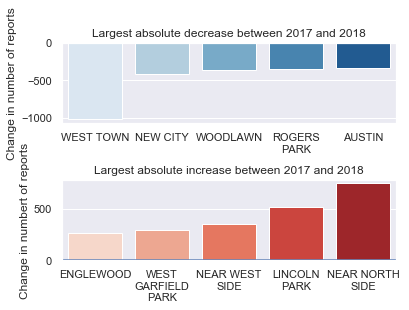

In [17]:
cc.summarize_yoy_change(crime_reports, 'community_area', 2017, 2018)

Though the overall number of crime reports citywide decreased slightly between 2017 and 2018, not all neighborhoods experienced a decrease in crime between those two years. Some neighborhoods, such as the Near North Side, exprienced substantial increases.

## Question 2

### Set-up

As imported, the crime reports dataset doesn't contain census geographies corresponding to where crime reports were filed. However, the dataset does contain latitude and longitude coordinates that can be combined with the "Boundaries - Census Blocks - 2010" dataset from the Chicago Open Data Portal to link crime reports with Census Blocks. 

Unfortunately, the Census Bureau only reports estimates for the 5-year ACS at the block group level. Therefore, after linking the crime reports with individuals blocks, the function removes the last three digits of the geoid10 field. This process generates an id for the Census block group in which a crime report falls.

In [18]:
crime_reports_blocks = cc.link_reports_blocks(crime_reports)

crime_reports_blocks

,arrest,beat,block,case_number,community_area,date,description,district,domestic,fbi_code,...,longitude,primary_type,updated_on,ward,x_coordinate,y_coordinate,year,the_geom,index_right,geoid10
0,True,1034,026XX S CALIFORNIA BLVD,JA529032,SOUTH LAWNDALE,2017-11-28 21:43:00,VIOLENT OFFENDER: ANNUAL REGISTRATION,010,False,26,...,-87.694638,OTHER OFFENSE,2018-02-11T15:54:58.000,12,1158280,1886310,2017,POINT (-87.69463767800001 41.843778126),36117.0,170318435001
1,True,1221,007XX N SACRAMENTO BLVD,JA545986,HUMBOLDT PARK,2017-12-11 19:15:00,ARMED: HANDGUN,012,False,03,...,-87.702169,ROBBERY,2018-02-11T15:54:58.000,27,1156092,1904769,2017,POINT (-87.702169158 41.894475919),32124.0,170318367002
5,True,0215,003XX E 47TH ST,JA522842,GRAND BOULEVARD,2017-11-23 15:14:00,AGGRAVATED: HANDGUN,002,False,04A,...,-87.619099,ASSAULT,2018-06-21T15:59:22.000,3,1178967,1873924,2017,POINT (-87.619098999 41.809342727),42140.0,170313814001
7,False,0524,117XX S SANGAMON ST,JB140548,WEST PULLMAN,2018-02-04 01:36:00,FIRST DEGREE MURDER,005,False,01A,...,-87.645661,HOMICIDE,2019-03-18T16:08:09.000,34,1172100,1827003,2018,POINT (-87.645661144 41.68073915),18393.0,170315303001
8,False,2433,011XX W GRANVILLE AVE,JB108189,EDGEWATER,2018-01-08 06:50:00,AUTOMOBILE,024,False,07,...,-87.659016,MOTOR VEHICLE THEFT,2018-05-04T15:51:04.000,48,1167554,1941332,2018,POINT (-87.659016317 41.99456734),6325.0,170310301022
9,False,2411,025XX W TOUHY AVE,JB108139,WEST RIDGE,2018-01-07 21:00:00,AUTOMOBILE,024,False,07,...,-87.693905,MOTOR VEHICLE THEFT,2018-05-04T15:51:04.000,50,1158022,1947685,2018,POINT (-87.69390481000001 42.01220081),263.0,170310202002
10,False,1834,004XX N MICHIGAN AVE,JB108319,NEAR NORTH SIDE,2018-01-05 18:10:00,RETAIL THEFT,018,False,06,...,-87.624110,THEFT,2018-05-04T15:51:04.000,42,1177357,1903444,2018,POINT (-87.624109917 41.890384236),27570.0,170310814031
12,False,2223,097XX S HALSTED ST,JB108166,WASHINGTON HEIGHTS,2018-01-08 04:09:00,ATTEMPT FORCIBLE ENTRY,022,False,05,...,-87.643094,BURGLARY,2018-05-04T15:51:04.000,21,1172695,1840280,2018,POINT (-87.643093654 41.71716022),1810.0,170317305004
14,True,1612,062XX N OLCOTT AVE,JB108167,NORWOOD PARK,2018-01-08 04:03:00,DOMESTIC BATTERY SIMPLE,016,False,08B,...,-87.813665,BATTERY,2018-05-04T15:51:04.000,41,1125516,1940832,2018,POINT (-87.813664825 41.993999504),28574.0,170311003005
18,False,0313,004XX E 63RD ST,JB108191,WOODLAWN,2018-01-08 06:55:00,TO VEHICLE,003,False,14,...,-87.615319,CRIMINAL DAMAGE,2018-05-04T15:51:04.000,20,1180086,1863329,2018,POINT (-87.615319321 41.780243493),39490.0,170314207005


Unfortunately, a small number of rows are missing longitude and latitude data or cannot be linked to census block data. To avoid errors later in the program, these rows are automatically dropped by the link_reports_blocks function.

In [19]:
print('All crime reports:', len(crime_reports))
print('Successfully linked crime reports:', len(crime_reports_blocks))
print('Dropped crime reports:', len(crime_reports) - len(crime_reports_blocks))

All crime reports: 534374
Successfully linked crime reports: 527211
Dropped crime reports: 7163


For this analysis, I have decided to augment the crime reports with data from the 2013-2017 American Community Survey 5-Year Estimates on educational attainment, race, and per capita income in 2017 inflation adjusted dollars. This data can be obtained through the Census Bureau API by calling the get_block_stats function in the chicago_crime module. This function downloads data for every block within the Cook County, Illinois.

In [20]:
block_stats = cc.get_block_stats()

block_stats

,Race sample,White alone,Black alone,Hispanic or Latino sample,Hispanic or Latino,Education sample,Bachelor's,Master's,Professional,PhD,"Per Capita Income, last 12 months (2017 inflation adjusted dollars)",state,county,tract,block group,geoid10,White alone (%),Black alone (%),Hispanic or Latino (%),Bachelor's or more (>= 25 y/o) (%)
0,600.0,11.0,589.0,600.0,0.0,389.0,22.0,11.0,0.0,0.0,13117.0,17,031,251900,1,170312519001,1.833333,98.166667,0.000000,8.483290
1,1546.0,78.0,1376.0,1546.0,92.0,730.0,0.0,0.0,0.0,0.0,11912.0,17,031,251900,2,170312519002,5.045278,89.003881,5.950841,0.000000
2,1341.0,977.0,23.0,1341.0,598.0,1005.0,77.0,20.0,0.0,0.0,20425.0,17,031,821101,1,170318211011,72.856078,1.715138,44.593587,9.651741
3,1356.0,1023.0,48.0,1356.0,456.0,869.0,139.0,8.0,0.0,0.0,21575.0,17,031,821101,3,170318211013,75.442478,3.539823,33.628319,16.915995
4,616.0,616.0,0.0,616.0,17.0,477.0,47.0,25.0,0.0,8.0,42711.0,17,031,821101,2,170318211012,100.000000,0.000000,2.759740,16.771488
5,1193.0,838.0,0.0,1193.0,329.0,664.0,115.0,19.0,0.0,0.0,19358.0,17,031,821101,4,170318211014,70.243085,0.000000,27.577536,20.180723
6,2054.0,1661.0,45.0,2054.0,1092.0,1297.0,116.0,50.0,1.0,5.0,20220.0,17,031,820202,1,170318202021,80.866602,2.190847,53.164557,13.261372
7,558.0,544.0,7.0,558.0,110.0,424.0,62.0,54.0,9.0,0.0,27964.0,17,031,820202,3,170318202023,97.491039,1.254480,19.713262,29.481132
8,752.0,748.0,4.0,752.0,114.0,564.0,184.0,29.0,0.0,0.0,33618.0,17,031,820202,2,170318202022,99.468085,0.531915,15.159574,37.765957
9,1700.0,1201.0,45.0,1700.0,1423.0,945.0,43.0,3.0,0.0,0.0,19461.0,17,031,820300,4,170318203004,70.647059,2.647059,83.705882,4.867725


In this question, we want to summarize blocks by the types of crime that occur on them. Included in chicago_crime is a function, named summarize_by_block, that groups a set of crime reports with census data by block and then summaries based on a user specified field

In [21]:
by_block_summary = cc.summarize_by_block(crime_reports_blocks, 'primary_type')

by_block_summary

primary_type,block,geoid10,ARSON,ASSAULT,BATTERY,BURGLARY,CONCEALED CARRY LICENSE VIOLATION,CRIM SEXUAL ASSAULT,CRIMINAL DAMAGE,CRIMINAL TRESPASS,...,OTHER NARCOTIC VIOLATION,OTHER OFFENSE,PROSTITUTION,PUBLIC INDECENCY,PUBLIC PEACE VIOLATION,ROBBERY,SEX OFFENSE,STALKING,THEFT,WEAPONS VIOLATION
0,0000X E 100TH PL,170314908003,0,8,21,3,0,0,7,1,...,0,1,0,0,0,0,0,0,2,4
1,0000X E 100TH ST,170314908003,0,8,11,0,0,0,6,0,...,0,10,0,0,0,0,0,0,5,1
2,0000X E 101ST PL,170314908005,0,1,8,5,0,0,3,1,...,0,2,0,0,0,1,0,0,6,1
3,0000X E 101ST ST,170314908003,0,1,5,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0000X E 101ST ST,170314908005,0,1,2,0,0,0,1,0,...,0,0,0,0,0,0,0,0,3,0
5,0000X E 102ND PL,170314908005,0,3,15,2,0,0,5,0,...,0,1,0,0,1,1,0,0,2,4
6,0000X E 102ND ST,170314908005,0,6,3,0,0,1,4,2,...,0,3,1,0,1,1,0,0,1,4
7,0000X E 103RD PL,170314909022,0,0,2,1,0,1,3,1,...,0,3,0,0,0,1,0,0,2,0
8,0000X E 103RD ST,170314908005,0,5,4,0,0,0,1,1,...,0,2,0,0,0,2,0,0,2,2
9,0000X E 103RD ST,170314909022,0,3,5,0,0,0,6,1,...,0,1,0,0,1,1,0,0,17,0


### Part (a)

In [22]:
battery_mask = by_block_summary.BATTERY >= 1
cc.describe_blocks(by_block_summary[battery_mask], block_stats)

,White alone (%),Black alone (%),Hispanic or Latino (%),Bachelor's or more (>= 25 y/o) (%),"Per Capita Income, last 12 months (2017 inflation adjusted dollars)"
count,22864.000000,22864.000000,22864.000000,22864.000000,22864.000000
mean,36.419451,46.439255,25.288943,28.228642,27244.622813
std,33.431812,42.631726,30.329504,23.901854,20781.479758
min,0.000000,0.000000,0.000000,0.000000,2971.000000
25%,2.056359,2.750929,1.344170,10.405785,14865.000000
50%,33.142857,31.618635,10.059172,20.038536,20588.000000
75%,68.203347,94.152047,43.314106,38.712602,30716.000000
max,100.000000,100.000000,100.000000,100.000000,277577.000000


In all, there were 22,864 blocks in this dataset on which one or more batteries were reported. On blocks with one or more reports of battery, the average per capita income in 2017 inflation adjusted dollars was $27,244.62. On average, the racial/ethnic composition of these blocks was 36.4\% identifying solely as white, 46.4\% identifying solely as black/African-American, and 25.3\% identifying as Hispanic or Latino of any race. Additionally, an average of 28.2\% of individuals aged 25 or older living on blocks with one or more reports of battery had earned a Bachelor's degree or higher.

### Part (b)

In [23]:
homicide_mask = by_block_summary.HOMICIDE >= 1
cc.describe_blocks(by_block_summary[homicide_mask], block_stats)

,White alone (%),Black alone (%),Hispanic or Latino (%),Bachelor's or more (>= 25 y/o) (%),"Per Capita Income, last 12 months (2017 inflation adjusted dollars)"
count,1107.000000,1107.000000,1107.000000,1107.000000,1107.000000
mean,16.489093,71.741700,18.104415,17.052259,18539.422764
std,24.466993,36.199868,28.212436,15.774631,12446.158211
min,0.000000,0.000000,0.000000,0.000000,2971.000000
25%,0.000000,56.082084,0.000000,7.244094,12183.500000
50%,3.780069,91.422367,3.797468,12.461059,15677.000000
75%,24.659625,97.955846,21.775976,21.454222,20700.000000
max,96.652268,100.000000,100.000000,93.017843,137729.000000


In all, there were 1,107 blocks in this dataset on which one or more homicides were reported. On blocks with one or more reports of homicide, the average per capita income in 2017 inflation adjusted dollars was $18,539.42. On average, the racial/ethnic composition of these blocks was 16.5\% identifying solely as white, 71.7\% identifying solely as black/African-American, and 18.1\% identifying as Hispanic or Latino of any race. Additionally, an average of 17.1\% of individuals aged 25 or older living on blocks with one or more reports of homicide had earned a Bachelor's degree or higher.

### Part (c)

In [24]:
#2017 Battery Data
mask_2017 = crime_reports_blocks.year == 2017

by_block_summary_2017 = cc.summarize_by_block(crime_reports_blocks[mask_2017], 'primary_type')
battery_mask_2017 = by_block_summary_2017.BATTERY >= 1

cc.describe_blocks(by_block_summary_2017[battery_mask_2017], block_stats)

,White alone (%),Black alone (%),Hispanic or Latino (%),Bachelor's or more (>= 25 y/o) (%),"Per Capita Income, last 12 months (2017 inflation adjusted dollars)"
count,17251.000000,17251.000000,17251.000000,17251.000000,17251.000000
mean,34.051656,49.382674,24.471932,27.016459,26248.344734
std,33.020442,42.632142,30.233928,23.414207,20321.565655
min,0.000000,0.000000,0.000000,0.000000,2971.000000
25%,1.595745,3.378922,1.089325,10.058027,14439.000000
50%,25.502232,48.014184,9.292763,19.126638,19784.000000
75%,65.103056,95.204795,41.193182,36.222510,29340.000000
max,100.000000,100.000000,100.000000,100.000000,277577.000000


In [25]:
#2018 Battery Data
mask_2018 = crime_reports_blocks.year == 2018

by_block_summary_2018 = cc.summarize_by_block(crime_reports_blocks[mask_2018], 'primary_type')
battery_mask_2018 = by_block_summary_2018.BATTERY >= 1

cc.describe_blocks(by_block_summary_2018[battery_mask_2018], block_stats)

,White alone (%),Black alone (%),Hispanic or Latino (%),Bachelor's or more (>= 25 y/o) (%),"Per Capita Income, last 12 months (2017 inflation adjusted dollars)"
count,17259.000000,17259.000000,17259.000000,17259.000000,17259.000000
mean,34.144107,49.253603,24.392432,27.371760,26589.313112
std,33.045526,42.631975,30.287287,23.826888,20708.009783
min,0.000000,0.000000,0.000000,0.000000,2971.000000
25%,1.627907,3.434505,1.158038,10.065646,14439.000000
50%,25.502232,47.613636,9.030837,19.101124,19812.000000
75%,65.409717,95.133030,40.872772,36.689038,29744.000000
max,100.000000,100.000000,100.000000,100.000000,173220.000000


Between the years 2017 and 2018, the demographic composition of blocks with one or more reports of battery is overwhelmingly constant for the statisics selected for this analysis. The 2017 and 2018 values of the average racial and ethnic composition statistics are all within 0.2 percentage points. The average percentage of those 25 years or older with a Bachelor's degree or higher is also within 0.4 percentage points between 2017 and 2018. Furthermore, the average per capita income in 2017 inflation adjusted dollars was `$26,248.34 in 2017 and `$26,589.31 in 2018.

In [26]:
#2017 Homicide Data
mask_2017 = crime_reports_blocks.year == 2017

by_block_summary_2017 = cc.summarize_by_block(crime_reports_blocks[mask_2017], 'primary_type')
homicide_mask_2017 = by_block_summary_2017.HOMICIDE >= 1

cc.describe_blocks(by_block_summary_2017[homicide_mask_2017], block_stats)

,White alone (%),Black alone (%),Hispanic or Latino (%),Bachelor's or more (>= 25 y/o) (%),"Per Capita Income, last 12 months (2017 inflation adjusted dollars)"
count,602.000000,602.000000,602.000000,602.000000,602.000000
mean,16.830426,71.136630,19.361026,16.829758,18495.853821
std,24.420080,36.511547,29.283545,14.363471,11892.908947
min,0.000000,0.000000,0.000000,0.000000,2971.000000
25%,0.189490,55.223881,0.000000,7.429719,12274.250000
50%,4.329417,91.328880,4.554728,12.886822,15898.000000
75%,25.116713,97.779258,26.671612,21.518783,20998.000000
max,96.652268,100.000000,99.375520,92.981187,137729.000000


In [27]:
#2018 Homicide Data
mask_2018 = crime_reports_blocks.year == 2018

by_block_summary_2018 = cc.summarize_by_block(crime_reports_blocks[mask_2018], 'primary_type')
homicide_mask_2018 = by_block_summary_2018.HOMICIDE >= 1

cc.describe_blocks(by_block_summary_2018[homicide_mask_2018], block_stats)

,White alone (%),Black alone (%),Hispanic or Latino (%),Bachelor's or more (>= 25 y/o) (%),"Per Capita Income, last 12 months (2017 inflation adjusted dollars)"
count,544.000000,544.000000,544.000000,544.000000,544.000000
mean,15.610205,73.232484,16.163444,16.988321,18494.406250
std,24.143538,35.328861,26.317745,16.975063,12736.168368
min,0.000000,0.000000,0.000000,0.000000,6553.000000
25%,0.000000,60.563443,0.000000,6.834842,12138.000000
50%,3.265377,91.762349,2.914478,12.021079,15142.000000
75%,20.178042,98.229530,20.020105,20.827491,20374.000000
max,92.729970,100.000000,100.000000,93.017843,110845.000000


Between the years 2017 and 2018, the demographic composition of blocks with one or more reports of homicide is also overwhelmingly constant for the statisics selected for this analysis. The 2017 and 2018 values of the average racial and ethnic composition statistics are all within 3.5 percentage points. The average percentage of those 25 years or older with a Bachelor's degree or higher is within 0.2 percentage points between 2017 and 2018. Furthermore, the average per capita income in 2017 inflation adjusted dollars was \\$18,495.85 in 2017 and \\$18,494.41 in 2018.

### Part (d)

In [28]:
#Deceptive Practices Data
deceptive_pratice_mask = by_block_summary['DECEPTIVE PRACTICE'] >= 1
cc.describe_blocks(by_block_summary[deceptive_pratice_mask], block_stats)

,White alone (%),Black alone (%),Hispanic or Latino (%),Bachelor's or more (>= 25 y/o) (%),"Per Capita Income, last 12 months (2017 inflation adjusted dollars)"
count,14900.000000,14900.000000,14900.000000,14900.000000,14900.00000
mean,43.150582,40.188550,22.385872,35.226430,33054.99349
std,34.825696,41.760436,27.578339,27.112649,24920.37943
min,0.000000,0.000000,0.000000,0.000000,2971.00000
25%,3.852002,1.972387,1.946552,12.698413,16198.00000
50%,46.731858,15.254237,9.712027,26.237624,24210.00000
75%,76.643465,91.790562,34.348562,54.757282,40582.00000
max,100.000000,100.000000,100.000000,100.000000,277577.00000


In [29]:
#Sex Offense Data
sex_offense_mask = by_block_summary['SEX OFFENSE'] >= 1
cc.describe_blocks(by_block_summary[sex_offense_mask], block_stats)

,White alone (%),Black alone (%),Hispanic or Latino (%),Bachelor's or more (>= 25 y/o) (%),"Per Capita Income, last 12 months (2017 inflation adjusted dollars)"
count,1750.000000,1750.000000,1750.000000,1750.000000,1750.000000
mean,41.452474,40.543089,25.726421,32.452070,30405.438286
std,33.484447,41.495609,30.337929,27.030665,24769.435248
min,0.000000,0.000000,0.000000,0.000000,2971.000000
25%,3.903910,2.598186,2.241793,10.598161,14556.250000
50%,44.943820,15.738422,10.566763,22.866265,21271.000000
75%,73.384804,91.790562,42.561576,49.737202,35552.000000
max,100.000000,100.000000,100.000000,95.098039,173220.000000


Blocks with one or more reported sex offense are highly similar to blocks with one or more reports for deceptive practices. On average, 41.5\% of individuals living on blocks with one or more reported sex offenses identify solely as white, 40.5\% identify solely as black, and 25.7\% identify as Hispanic or Latino of any race. For comparison, an average of 43.2\% of individuals living on blocks with one or more deceptive practices reports identify solely as white, 40.2\% identify solely as black, and 22.4% identify as Hispanic or Latino of any race. So, ACS data estimates that individuals living on blocks with a report of a sex offense a slighly more likely to be Hispanic and slightly less likely to be white but only marginallys so.

In terms of education, 32.5% of individuals 25 or older living on blocks with one or more reports of a sex offense have a Bachelor's degree or higher whereas 35.3% of those individuals living on blocks with one or more reports of deceptive practices have a Bachelor's degree or higher. The selected ACS estimates therefore suggest that individuals living on blocks with one or more reports of deceptive practices may be slighly more educated than those living on blocks with one or more reports of a sex offense. 

Finally, the ACS estimate of per capital income in 2017 inflation adjusted dollars is \\$2,649.56 higher on blocks with one or more reports of deceptive practices than on blocks with one or more reports of sex offenses.



## Question 3

### Initialization

Loading in pandas to ease working with dates.

In [30]:
import pandas as pd

### Part (a)

In [31]:
cc.summarize_yearly(crime_reports)

      Number of Reports  Percent Change
2017             268096             NaN
2018             266278       -0.678115


Type of Crime:
year                                2017   2018  Change (absolute)
primary_type                                                      
ROBBERY                            11877   9682              -2195
MOTOR VEHICLE THEFT                11406   9988              -1418
BURGLARY                           13000  11730              -1270
CRIMINAL DAMAGE                    29042  27806              -1236
DECEPTIVE PRACTICE                 19028  18736               -292
PUBLIC PEACE VIOLATION              1498   1369               -129
OTHER OFFENSE                      17227  17130                -97
HOMICIDE                             676    586                -90
ARSON                                444    372                -72
OFFENSE INVOLVING CHILDREN          2268   2229                -39
KIDNAPPING                           190    169                -21
PROSTITUTION                         735    718                -17
OTHER NARCOTIC VIOLATION              11      1

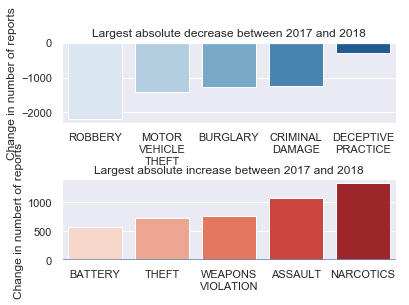

In [32]:
print('Type of Crime:')
cc.summarize_yoy_change(crime_reports, 'primary_type', 2017, 2018)

Neighborhoods:
year                     2017   2018  Change (absolute)
community_area                                         
WEST TOWN                8324   7301              -1023
NEW CITY                 4645   4221               -424
WOODLAWN                 3840   3469               -371
ROGERS PARK              4148   3801               -347
AUSTIN                  15386  15042               -344
SOUTH CHICAGO            4574   4316               -258
BELMONT CRAGIN           4605   4359               -246
GAGE PARK                2306   2063               -243
LOWER WEST SIDE          2626   2385               -241
GRAND BOULEVARD          3451   3242               -209
IRVING PARK              3008   2818               -190
PORTAGE PARK             3371   3198               -173
AUBURN GRESHAM           7527   7370               -157
LOGAN SQUARE             5064   4909               -155
MCKINLEY PARK            1052    906               -146
GREATER GRAND CROSSING   6481   6

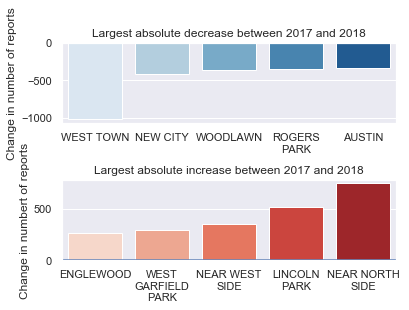

In [33]:
print('Neighborhoods:')
cc.summarize_yoy_change(crime_reports, 'community_area', 2017, 2018)

2017 Geographic Distribution of Crime:


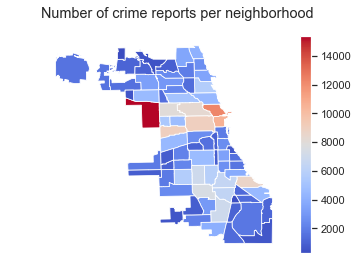


2018 Geographic Distribution of Crime:


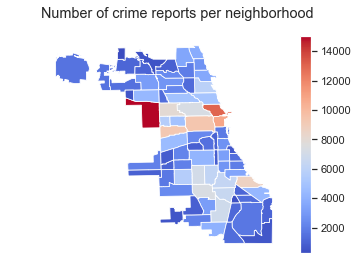

In [34]:
print('2017 Geographic Distribution of Crime:')
cc.map_neighborhood_stats(crime_reports[crime_reports.year == 2017], community_areas)
print()

print('2018 Geographic Distribution of Crime:')
cc.map_neighborhood_stats(crime_reports[crime_reports.year == 2018], community_areas)

Overall, the number of crime reports across the city remained mostly steady between 2017 and 2018. In 2017, a total of 268,096 crime reports were filed, and in 2018, a total of 266,278 crime reports were filed, which amounts to a year to year decrease of 0.68%. 

The overall decrease did not translate into decreases in every type of crime report between 2017 and 2018. While there were more than 1,000 fewer reports of motor vehicle thefts, burglaries, and criminal damages and more than 2,000 fewer reports of robberies, there were also 1330 more narcotics related reports and 1074 more assual related reportes. Other types of crime reports that increased substantially between 2017 and 2018 included weapons violations, thefts, and batteries. In all, there were 15 types of crimes for which the number of reports decreased between 2017 and 2018, 16 types for which the number of reports increased between 2017 and 2018, and 1 for which there was no change in the number of reports between 2017 and 2018.

Furthermore, despite the overall decrease across the entire city, not all neighborhoods experienced a decrease in crime. In specific, 30 neighborhoods had more crime reports filed in 2018 than in 2017, lead by the Near North Side where an additional 745 crime reports were filed in 2018 compared to 2017. Other neighborhoods experiencing large increases in the number of crime reports filed between 2017 and 2018 included Lincoln Park, the Near West Side, West Garfield Park, and Englewood. Other neighborhoods, however, did se substantial decreases in crime reports between 2017 and 2018. West Town, for example, had the largest decrease with 1023 fewer crime reports in 2018 than in 2017. The next largest decrease was in New City, with 424 fewer crime, followed by Woodlawn, Rogers Park and Austin.

Despite some varying neighborhood-specific changes in the number of crime reports between 2017 and 2018, the overall distribtuion of crime across the city remained quite similar between the two years, as seen in the two maps above.

### Part (b.1)

We take the candidates use of the word month to imply a 28 day period based on its use later in the statement. Furthermore, since the candidate is talking about how crime has affected "our local neighborhood," we also limit the dataset to the ward in which he was running for office, the 43rd.

In [35]:
start_date_2017 = '2017-06-29'
start_date_2017 = pd.to_datetime(start_date_2017)
end_date_2017 = '2017-07-27'
end_date_2017 = pd.to_datetime(end_date_2017)
mask_2017 = (start_date_2017 <= crime_reports.date)  & (crime_reports.date < end_date_2017)

start_date_2018 = '2018-06-29'
start_date_2018 = pd.to_datetime(start_date_2018)
end_date_2018 = '2018-07-27'
end_date_2018 = pd.to_datetime(end_date_2018)
mask_2018 = (start_date_2018 <= crime_reports.date)  & (crime_reports.date < end_date_2018)

mask_location = crime_reports.ward == '43'

mask = (mask_2017 | mask_2018) & mask_location
crime_reports_ringer = crime_reports[(mask)]

mask_robbery = crime_reports_ringer.primary_type == 'ROBBERY'
print('Change in robbery reports:')
cc.summarize_yearly(crime_reports_ringer[mask_robbery])

Change in robbery reports:
      Number of Reports  Percent Change
2017                 16             NaN
2018                  8           -50.0


The number of crime reports filed for robbery between 6/29/2018 and 7/26/2018 in the 43rd ward was 50.0% lower than the number of crime reports filed for robbery between 6/29/2017 and 7/26/2017 in the 43rd ward, suggesting that the candidate's statistic (a 21% increase) is incorrect in both magnitude and sign.

In [36]:
mask_battery = crime_reports_ringer.primary_type == 'BATTERY'
print('Change in battery reports:')
cc.summarize_yearly(crime_reports_ringer[mask_battery])

Change in battery reports:
      Number of Reports  Percent Change
2017                 41             NaN
2018                 34      -17.073171


The number of crime reports filed for battery between 6/29/2018 and 7/26/2018 in the 43rd ward was 17.1% lower than the number of crime reports filed for battery between 6/29/2017 and 7/26/2017 in the 43rd ward, suggesting that the candidate's statistic (a 136% increase) is incorrect in magnitude and sign.

In [37]:
mask_burglary = crime_reports_ringer.primary_type == 'BURGLARY'
print('Change in burglary reports:')
cc.summarize_yearly(crime_reports_ringer[mask_burglary])

Change in burglary reports:
      Number of Reports  Percent Change
2017                 15             NaN
2018                 14       -6.666667


The number of crime reports filed for burglary between 6/29/2018 and 7/26/2018 in the 43rd ward was 6.7% lower than the number of crime reports filed for burglary between 6/29/2017 and 7/26/2017 in the 43rd ward, suggesting that the candidate's statistics (a 50% increase) is incorrect in both magnitude and sign.

In [38]:
mask_auto_theft = crime_reports_ringer.primary_type == 'MOTOR VEHICLE THEFT'
print('Change in motor vehicle theft reports:')
cc.summarize_yearly(crime_reports_ringer[mask_auto_theft])

Change in motor vehicle theft reports:
      Number of Reports  Percent Change
2017                  6             NaN
2018                 10       66.666667


The number of crime reports filed for motor vehicle theft between 6/29/2018 and 7/26/2018 in the 43rd ward was 66.7% higher than the number of crime reports filed for motor vehicle theft between 6/29/2017 and 7/26/2017 in the 43rd ward, suggesting that the candidate's statistic (a 41% increase) is incorrect in magnitude though not in sign. In fact, the candidate's statistic is actually an underestimate compared to the statistic generated in this analysis.

In [39]:
print('Change in total reports:')
cc.summarize_yearly(crime_reports_ringer)

Change in total reports:
      Number of Reports  Percent Change
2017                341             NaN
2018                377       10.557185


The total number of crime reports filed  between 6/29/2018 and 7/26/2018 in the 43rd ward was 10.6% higher than the  totalnumber of crime reports filed between 6/29/2017 and 7/26/2017 in the 43rd ward, suggesting that the candidate's statistic (a 16% increase) is incorrect in magnitude though not in sign. 

In [40]:
crime_reports_2016 = cc.download_crime_reports(2016, 2018)

In [41]:
mask_2017 = (crime_reports_2016.year == 2017) & (crime_reports_2016.date < end_date_2017)
mask_2018 = (crime_reports_2016.year == 2018) & (crime_reports_2016.date < end_date_2018)

mask_location = crime_reports_2016.ward == '43'
print('Comparing 2017 YTD 7/26 to 2018 YTD 7/26:')
cc.summarize_yearly(crime_reports_2016[(mask_2017 | mask_2018) & mask_location])

Comparing 2017 YTD 7/26 to 2018 YTD 7/26:
      Number of Reports  Percent Change
2017               2159             NaN
2018               2368        9.680408


The total number of crime reports filed  between 1/1/2018 and 7/26/2018 in the 43rd ward was 9.6% higher than the total number of crime reports filed between 1/1/2017 and 7/26/2017 in the 43rd ward, which is approximately the same as the candidate's statistic (10% increase).

In [42]:
end_date_2016 = end_date_2016 = '2016-07-27'
end_date_2016 = pd.to_datetime(end_date_2016)

mask_2016 = (crime_reports_2016.year == 2016) & (crime_reports_2016.date < end_date_2016)
print('Comparing 2016 YTD 7/26 to 2018 YTD 7/26:')
cc.summarize_yearly(crime_reports_2016[(mask_2016 | mask_2018) & mask_location])

Comparing 2016 YTD 7/26 to 2018 YTD 7/26:
      Number of Reports  Percent Change
2016               1981             NaN
2018               2368       19.535588


The total number of crime reports filed for motor vehicle theft between 1/1/2018 and 7/26/2018 in the 43rd ward was 19.5% higher than the total number of crime reports filed between 1/1/2016 and 7/26/2015 in the 43rd ward, which is close to the candidate's statistic (22% increase).

In summary, the candidate's statistics when separting crimee by type were wholly inaccurate compared to the crime reports data set. The candidate's statistics on  roberies, aggrevated batteries, and burglaries for the month leading up to July 26 are substantialy larger than what we calculate from the publicly available set of crime reports. The candidates's statistic on motor vehicle thefts over that period, however, was considerably lower than what we calculated here. The candidate's statistic on the total change in crime between 2018 and 2017 in crime in the 43rds ward for the month leading up to July 26 are also significantly larger than what we calculated here. 

However, the candidate's year to date estimates, which compared crime in the 43rd ward between January 1 and July 25 across 2018, 2017, and 2016 are reasonably similar to what we calculated based on the crime reports data set.

### Part (b.2)

I ultimately disagree with the candidate's conclusion that rising crime is a major problem within his ward, but this analysis is not related to the statistics that the candidate is presenting. In addition to being inaccurate relative to the analysis performed here, the candidate's statistics have the potential to be misleading because of how they restrict the time period. Restricting analysis to a single arbitrary month period or to all the times before a certain arbitrary date gives a less complete picture of how crime is changing in the area than considering how crime changes over an entire year long period. Randomness in when crimes are committed may make the increase look better or worse than comparing over an entire year. Furthermore, the only statistics that the candidate reported correctly were aggregate statistics, which can only tell us that total crime is rising but not how the composition of crimes is changing. A large spike in serious, violent crimes, such as homicides or robberies, is much more concering than large spikes in less serious, non-violent crimes, such as liquor law violations or criminal trespassing.

To form my own conclusion about crime in the ward, I generated a comparison of crime reports in the 43rd ward for the entirety of 2017 to the entirety of 2018, and an analysis of how the types of crime reports in the 43rd ward differed between 2017 and 2018. Between all of 2017 and all of 2018, there was an 7.5% increase in the number of crime reports in the 43rd ward, amounting to 301 more crime reports in 2017 than in 2018. Separating the crime reports by type reveals that this overall increase in crime reports is largely due to increases in less serious, non-violent crimes. For example, there were 198 more thefts reports in the 43rd ward in 2018 than in 2017. While there are some more concerning increases, such as the 59 additional assaults reported in the 43rd warde in 2018 compared to 2017, the fact that the year over year increase in crime is primarily a result of spikes in less serious, non-violent types of crime ultimately contrasts with the candidate's strong rhetoric about crime being a major issue in his ward. Continued increases in the number of assualt related reports over multiple years, however, would elevate my concern about crime in this ward.

In [43]:
crime_reports_43 = crime_reports[crime_reports.ward == '43']
cc.summarize_yearly(crime_reports_43)

      Number of Reports  Percent Change
2017               4009             NaN
2018               4310        7.508107


year                               2017  2018  Change (absolute)
primary_type                                                    
MOTOR VEHICLE THEFT                 162   139                -23
BATTERY                             359   342                -17
DECEPTIVE PRACTICE                  447   431                -16
CRIM SEXUAL ASSAULT                  28    21                 -7
OFFENSE INVOLVING CHILDREN           10     6                 -4
ROBBERY                             140   136                 -4
KIDNAPPING                            5     1                 -4
NARCOTICS                            26    23                 -3
CONCEALED CARRY LICENSE VIOLATION     2     0                 -2
OBSCENITY                             3     1                 -2
NON-CRIMINAL                          1     0                 -1
HUMAN TRAFFICKING                     1     0                 -1
INTERFERENCE WITH PUBLIC OFFICER      5     4                 -1
ARSON                    

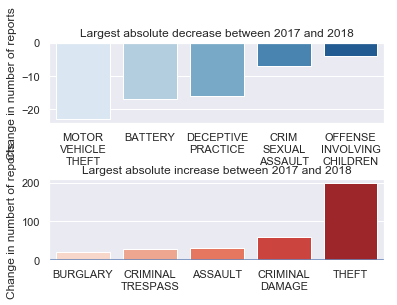

In [44]:
cc.summarize_yoy_change(crime_reports_43, 'primary_type', 2017, 2018)

### Part (c)

Based on the summary statistics in Question 1, I find and recommend that:

1. Though crime reports fell between 2017 and 2018, this decrease was not observed by all communities, and the city should work to address crime at the neighborhood or other similarly local level. Improvements in safety are not necessarily being experienced by all Chicagoans, even if total crime in the city decreases.
2. Furthermore, different types of crime reports are concentrated in different parts of the city, underscoring the previous recommendation for the city to address crime at the neighborhood or other similarly local level. Since the composition of crime reports varies across different neighborhoods, the resources and strategies needed to address it may differ between neighborhoods.
3. Crime reports are neither evenly nor normally distributed across different neighborhoods, and there are some neighborhoods reporting extremely high levels of crime relative to the rest of the city. The city should study the sources of this drastic inequality in safety and work to address it.
4. The mayor's office should invest significant resources in understanding the precise reasons behind the seasonal trends in crime reports and work to addresses the factors causing crime to spike during the summer months.
5. While the city experienced an overall decrease in crime report between 2017 and 2018, the number of crime reports did not decrease for all types of crime. This finding suggests that the causes and means of prevention may be different across different types of crime, and that the city should consider whether the tactics used to address one type of crime are effective at addressing other types of crime.

### Part (d) 

The most important caveat of this analysis is that all the summary statistics are based on crime reports data and not actual crimes. We are assuming that the crime reports data is reasonably representative of actual incidents of crime occurring in the city. This assumption, however, is not guaranteed and may not be true if some groups of people feel distustful of the city's police and are less likely to report crimes or if any other reason causes differential crime reporting rates among different groups. Furthermore, it should be noted that all of the work in this analysis is correlative and not causal. Though it may suggest possible courses of action or subjects for study with regard to crime in Chicago, it cannot and does not purport to establish any definitive causal links.

## Question 4

### Set-up

Importing numpy to ease some calculations.

In [45]:
import numpy as np

### Part (a)

In [46]:
mask = crime_reports.block == "021XX S MICHIGAN AVE"
counts = crime_reports[mask].primary_type\
                            .value_counts()
pcts = counts.apply(lambda x: x / np.sum(counts))

pcts

BATTERY                   0.266667
OTHER OFFENSE             0.216667
THEFT                     0.100000
CRIMINAL DAMAGE           0.100000
ASSAULT                   0.100000
DECEPTIVE PRACTICE        0.100000
MOTOR VEHICLE THEFT       0.033333
ROBBERY                   0.033333
CRIMINAL TRESPASS         0.016667
BURGLARY                  0.016667
PUBLIC PEACE VIOLATION    0.016667
Name: primary_type, dtype: float64

Given that a call is coming from 2111 S Michigan Avenue, it is most likely that the call is for battery. The probabilites of each type are listed in the table above.

### Part (b)

In [47]:
mask = crime_reports.primary_type == 'THEFT'
counts = crime_reports[mask].community_area\
                            .value_counts()
pcts = counts.apply(lambda x: x / np.sum(counts))

print('Uptown probability:', pcts['UPTOWN'])
p_garfield = pcts['EAST GARFIELD PARK'] + pcts['WEST GARFIELD PARK']
print("East and West Garfield Park:", p_garfield)
print('Difference:', (p_garfield - pcts['UPTOWN']))

Uptown probability: 0.015097196897116543
East and West Garfield Park: 0.019269400747906174
Difference: 0.004172203850789631


Since there is not a single Chicago neighborhood named Garfield Park, we take Garfield Park to mean the combination of East Garfield Park and West Garfield Park.

Given that a call comes in about theft, there is a 0.015 (1.5%) chance that the call is from Uptown and a 0.019 (1.9%) chance that the call is from East or West Garfield Park. Therefore, it is more likely that the call is from East or West Garfield Park. In specific, it is 0.4 percentage points more likely that the call is from East or West Garfield Park than from Uptown.

### Part (c)